## Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

The dataset: https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/information

In [2]:
data = pd.read_csv('data/la-haute-borne-data-2017-2020.csv',sep=';')

In [3]:
data['Date_time'] = pd.to_datetime(data['Date_time'], utc=True)


In [4]:
data = data.drop('Va1_avg', 1)
data = data.drop('Va2_avg', 1)
data = data.drop('Pas_avg', 1)


<ipython-input-4-480b76358e99>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Va1_avg', 1)
<ipython-input-4-480b76358e99>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Va2_avg', 1)
<ipython-input-4-480b76358e99>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Pas_avg', 1)


In [5]:
# features:

# Ws -> Wind Speed
# Gost -> gearbox oil sump temp
# Ot_avg -> outdoor temp
# Rs_avg -> rotor speed
# Rbt_avg -> rotor bearing temp

In [6]:
selected_columns = data[["P_avg","Ws_avg","Gost_avg","Ot_avg","Rs_avg","Rbt_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df = df[df['P_avg'].notna()]
df = df[df['Ws_avg'].notna()]
df = df[df['Gost_avg'].notna()]
df = df[df['Ot_avg'].notna()]
df = df[df['Rs_avg'].notna()]
df = df[df['Rbt_avg'].notna()]

In [7]:
x1 = df[["Ws_avg","Gost_avg","Ot_avg","Rs_avg","Rbt_avg"]]
y1 = df['P_avg']

In [8]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [9]:
from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train1,y_train1)

In [10]:
plt.rcParams['agg.path.chunksize'] = 10000

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


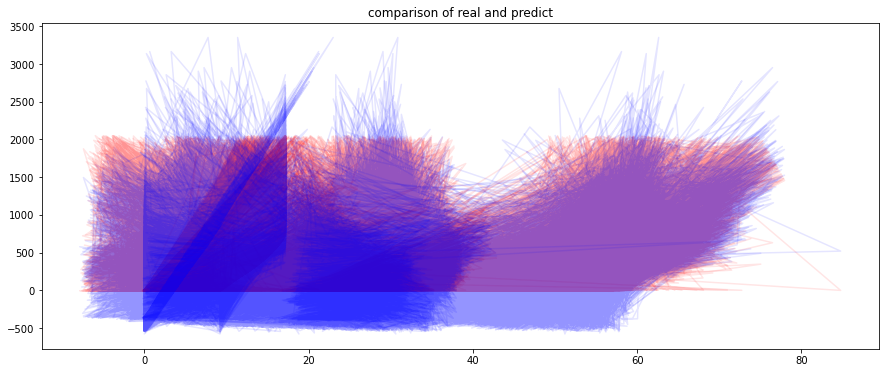

In [11]:
plt.plot(x_test1.values, y_test1.values, color = 'red', alpha=0.1)
plt.plot(x_test1.values, LinR.predict(x_test1.values), color = 'blue', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [12]:
print('Coefficients:', model.coef_)

Coefficients: [170.53376815  -1.56668492  -4.02782732  -8.45611372   0.18899255]


In [13]:
y_pred1 = abs(LinR.predict(x_test1)) 
print("MAE: {}".format(np.abs(y_test1-y_pred1).mean()))
print("RMSE: {}".format(np.sqrt(((y_test1-y_pred1)**2).mean())))

MAE: 148.2220689591458
RMSE: 200.16379149580575


In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test1, y_pred1)
r2

0.8095968275384902

In [15]:
# features:

# S -> Apparent Power
# Q -> Reactive Power
# Dst -> Generator stator temperatur
# Gb1t -> Gearbox bearing 1 temperature
# Yt -> Nacelle Temperature
# WS1 -> Wind Speed 1
# WS2 -> Wind SPeed 2

In [16]:
selected_columns = data[["P_avg","Q_avg","Dst_avg","Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
df2 = selected_columns.copy()
df2.dropna(axis = 0, how ='any', inplace=True)
df2 = df2[df2['P_avg'].notna()]
df2 = df2[df2['Q_avg'].notna()]
df2 = df2[df2['Dst_avg'].notna()]
df2 = df2[df2['Gb1t_avg'].notna()]
df2 = df2[df2['Yt_avg'].notna()]
df2 = df2[df2['Ws1_avg'].notna()]
df2 = df2[df2['Ws2_avg'].notna()]


In [17]:
x2 = df2[["Q_avg","Dst_avg","Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
y2 = df2['P_avg']

In [18]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [19]:
from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train2,y_train2)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


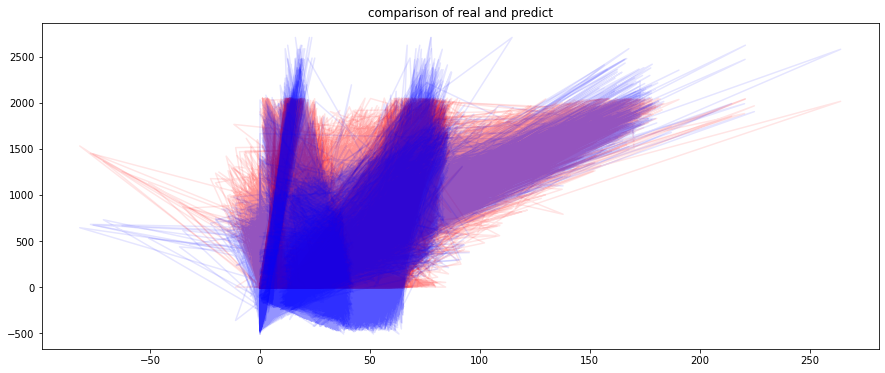

In [20]:
plt.plot(x_test2.values, y_test2.values, color = 'red', alpha=0.1)
plt.plot(x_test2.values, LinR.predict(x_test2.values), color = 'blue', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [21]:
print('Coefficients:', model.coef_)

Coefficients: [  3.60379894  -1.93680688   3.07648669 -10.4492971   83.26742985
  25.04771021]


In [22]:
y_pred2 = abs(LinR.predict(x_test2)) 
print("MAE: {}".format(np.abs(y_test2-y_pred2).mean()))
print("RMSE: {}".format(np.sqrt(((y_test2-y_pred2)**2).mean())))

MAE: 136.24285150392484
RMSE: 175.48191906466886


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test2, y_pred2)
r2

0.8540898344618946

In [24]:
# Gb1t -> Gearbox bearing 1 temperature
# Yt -> Nacelle Temperature
# WS1 -> Wind Speed 1
# WS2 -> Wind SPeed 2

In [25]:
selected_columns = data[["P_avg","Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
df3 = selected_columns.copy()
df3.dropna(axis = 0, how ='any', inplace=True)
df3 = df3[df3['P_avg'].notna()]
df3 = df3[df3['Gb1t_avg'].notna()]
df3 = df3[df3['Yt_avg'].notna()]
df3 = df3[df3['Ws1_avg'].notna()]
df3 = df3[df3['Ws2_avg'].notna()]

x3 = df3[["Gb1t_avg","Yt_avg","Ws1_avg","Ws2_avg"]]
y3 = df3['P_avg']


In [26]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.2, random_state = 42)

In [27]:
from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train3,y_train3)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


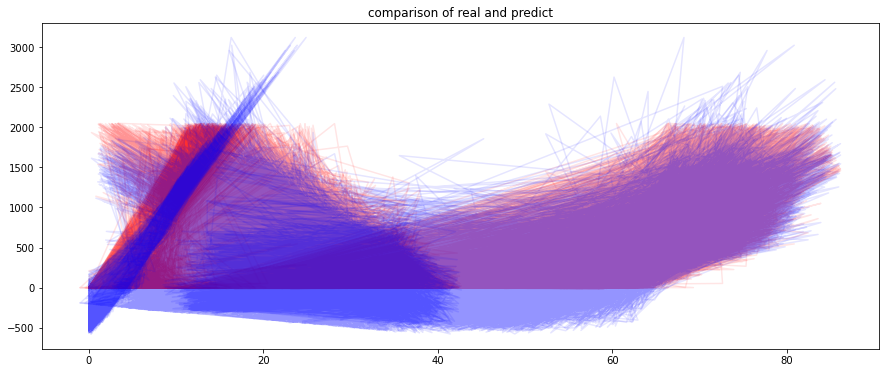

In [28]:
plt.plot(x_test3.values, y_test3.values, color = 'red', alpha=0.1)
plt.plot(x_test3.values, LinR.predict(x_test3.values), color = 'blue', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [29]:
print('Coefficients:', model.coef_)

Coefficients: [  1.47478473 -11.22690368  78.29228066  62.33624991]


In [30]:
y_pred3 = abs(LinR.predict(x_test3)) 
print("MAE: {}".format(np.abs(y_test3-y_pred3).mean()))
print("RMSE: {}".format(np.sqrt(((y_test3-y_pred3)**2).mean())))

MAE: 146.02860421486912
RMSE: 192.5442873304526


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test3, y_pred3)
r2

0.825070835893239

In [32]:
# Date_time -> Gearbox bearing 1 temperature
# WS1 -> Wind Speed 1
# WS2 -> Wind SPeed 2

In [33]:
selected_columns = data[["P_avg","Date_time","Ws1_avg","Ws2_avg"]]
df4 = selected_columns.copy()
df4['Date_time'] = pd.to_numeric(pd.to_datetime(df4['Date_time']))
df4.dropna(axis = 0, how ='any', inplace=True)
df4 = df4[df4['P_avg'].notna()]
df4 = df4[df4['Date_time'].notna()]
df4 = df4[df4['Ws1_avg'].notna()]
df4 = df4[df4['Ws2_avg'].notna()]

x4 = df4[["Date_time","Ws1_avg","Ws2_avg"]]
y4 = df4['P_avg']

In [34]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size = 0.2, random_state = 42)

In [35]:
from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train4,y_train4)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


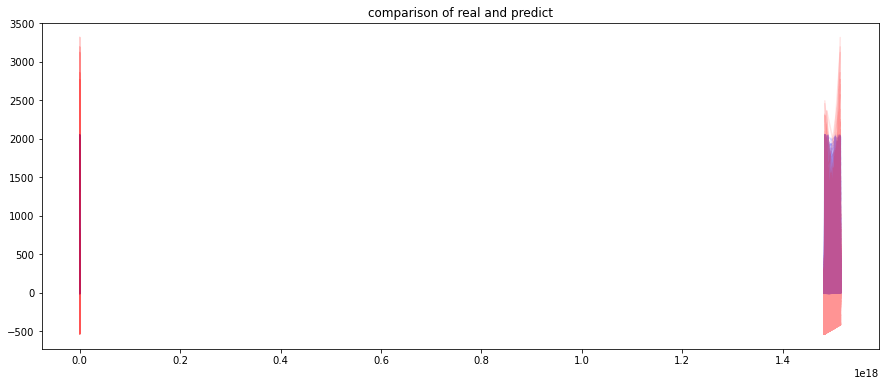

In [36]:
plt.plot(x_test4.values, y_test4.values, color = 'blue', alpha=0.1)
plt.plot(x_test4.values, LinR.predict(x_test4.values), color = 'red', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [37]:
print('Coefficients:', model.coef_)

Coefficients: [3.71240821e-15 7.90678817e+01 7.47973214e+01]


In [38]:
y_pred4 = abs(LinR.predict(x_test4)) 
print("MAE: {}".format(np.abs(y_test4-y_pred4).mean()))
print("RMSE: {}".format(np.sqrt(((y_test4-y_pred4)**2).mean())))

MAE: 161.90476113079006
RMSE: 209.55569308347287


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test4, y_pred4)
r2

0.7927951707955114

In [40]:
# features RFE algorithm:

# Ws_avg --> Wind Speed avg
# Cosphi_avg --> phase angle between voltage and current
# Ws2_avg --> Wind Speed second anemometer avg
# Ws1_avg --> Wind Speed first anemometer avg

In [41]:
selected_columns = data[["P_avg","Ws_avg","Cosphi_avg","Ws1_avg","Ws2_avg"]]
df5 = selected_columns.copy()
df5.dropna(axis = 0, how ='any', inplace=True)
df5 = df5[df5['P_avg'].notna()]
df5 = df5[df5['Cosphi_avg'].notna()]
df5 = df5[df5['Ws_avg'].notna()]
df5 = df5[df5['Ws1_avg'].notna()]
df5 = df5[df5['Ws2_avg'].notna()]

x5 = df5[["Cosphi_avg","Ws1_avg","Ws_avg","Ws2_avg"]]
y5 = df5['P_avg']

In [42]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size = 0.2, random_state = 42)

from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train5,y_train5)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


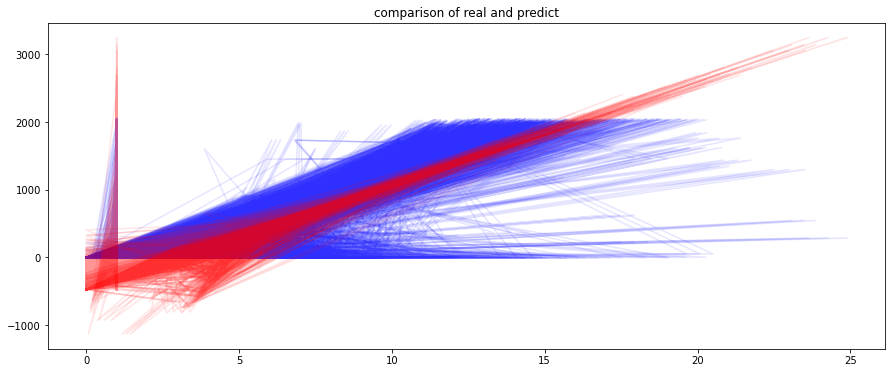

In [43]:
plt.plot(x_test5.values, y_test5.values, color = 'blue', alpha=0.1)
plt.plot(x_test5.values, LinR.predict(x_test5.values), color = 'red', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [44]:
print('Coefficients:', model.coef_)
y_pred5 = abs(LinR.predict(x_test5)) 
print("MAE: {}".format(np.abs(y_test5-y_pred5).mean()))
print("RMSE: {}".format(np.sqrt(((y_test5-y_pred5)**2).mean())))
from sklearn.metrics import r2_score
r2 = r2_score(y_test5, y_pred5)
print("r2: {}".format(r2))

Coefficients: [915.16636133 -52.91231664 202.95207721   4.9556384 ]
MAE: 156.5296844167039
RMSE: 202.67109561448814
r2: 0.8061862540174008


In [51]:
# features RFE algorithm:

# Nf_avg --> Grid frequency avg
# Rt_avg --> hub temperature avg
# Db2t_avg --> bearing temperatur 2 avg
# Va_avg --> Vane position avg
# Ot_avg --> outdoor temperature avg

In [52]:
selected_columns = data[["P_avg","Nf_avg","Rt_avg","Db2t_avg","Va_avg","Ot_avg"]]
df6 = selected_columns.copy()
df6.dropna(axis = 0, how ='any', inplace=True)
df6 = df6[df6['P_avg'].notna()]
df6 = df6[df6['Nf_avg'].notna()]
df6 = df6[df6['Rt_avg'].notna()]
df6 = df6[df6['Db2t_avg'].notna()]
df6 = df6[df6['Va_avg'].notna()]
df6 = df6[df6['Ot_avg'].notna()]

x6 = df6[["Nf_avg","Rt_avg","Db2t_avg","Va_avg","Ot_avg"]]
y6 = df6['P_avg']

In [56]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train6, x_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size = 0.2, random_state = 42)

from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train6,y_train6)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


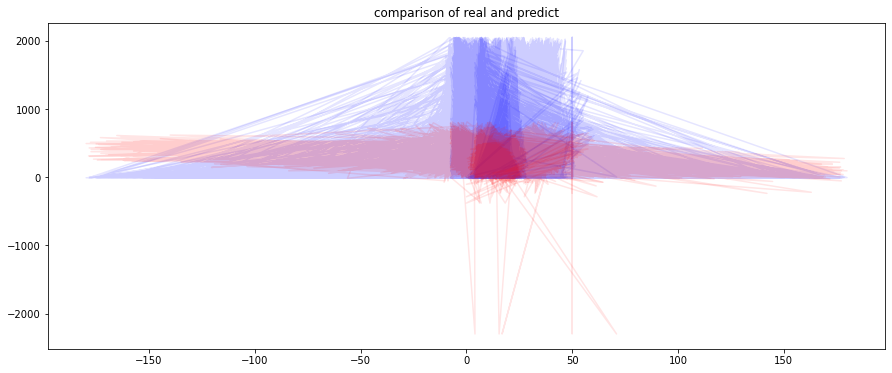

In [57]:
plt.plot(x_test6.values, y_test6.values, color = 'blue', alpha=0.1)
plt.plot(x_test6.values, LinR.predict(x_test6.values), color = 'red', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [59]:
print('Coefficients:', model.coef_)
y_pred6 = abs(LinR.predict(x_test6)) 
print("MAE: {}".format(np.abs(y_test6-y_pred6).mean()))
print("RMSE: {}".format(np.sqrt(((y_test6-y_pred6)**2).mean())))
from sklearn.metrics import r2_score
r2 = r2_score(y_test6, y_pred6)
print("r2: {}".format(r2))

Coefficients: [ 10.40524996  30.89446737   9.94127928  -0.9008355  -39.51778446]
MAE: 334.8481592727844
RMSE: 453.8117534718977
r2: 0.07286842781483849
